# Step 1: Exploratory Data Analysis
This stage is the very initial stage of your
data analysis. You may want to know the size and sentiment distribution of
the dataset. You may also want to examine if there are any missing values.
This initial data analysis stage helps you to have a better understanding of the
dataset before you build your sentiment classification models.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
print(f'Size of the data: {df.shape}')

Size of the data: (1048575, 3)


In [4]:
df.head(10)

,Index,Sentiment,Text
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,is upset that he can't update his Facebook by ...
2,2,0,@Kenichan I dived many times for the ball. Man...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,"@nationwideclass no, it's not behaving at all...."
5,5,0,@Kwesidei not the whole crew
6,6,0,Need a hug
7,7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,8,0,@Tatiana_K nope they didn't have it
9,9,0,@twittera que me muera ?


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Index      1048575 non-null  int64 
 1   Sentiment  1048575 non-null  int64 
 2   Text       1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
import matplotlib.pyplot as plt

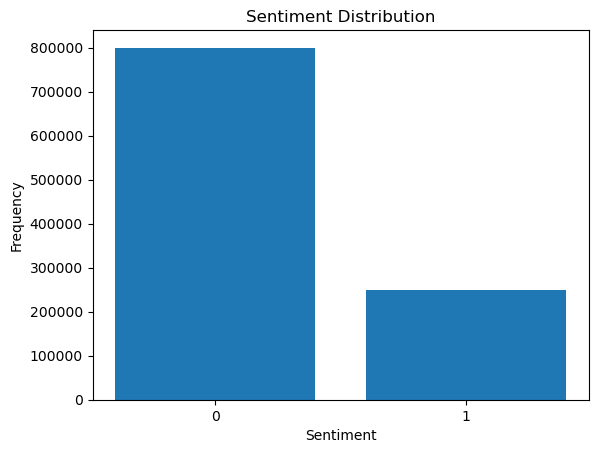

In [7]:
#graph the distribution of sentiment, values are either 0 or 1, we split it up using value_counts()

data = df['Sentiment'].value_counts()

fig, ax = plt.subplots(1,1)

ax.bar([0,1], data.values)
plt.xticks([0,1], data.index.values)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Frequency')

ax.set_title('Sentiment Distribution')


plt.show()

In [8]:
# check how many values are null in the data

print(df.isnull().sum())

Index        0
Sentiment    0
Text         0
dtype: int64


# Step 2: Text Preprocessing
You need to prepare your training and testing
dataset. Specifically for this problem, you need to preprocess the discussion
texts, you may want to convert all words into lowercase and remove digital
numbers and special characters. Please refer to our slides and class
discussions for a full list of text preprocessing steps.

In [9]:
# load the testing and training csv's into dataframes

train_full = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [10]:
# resample training data

t1 = train_full.loc[train_full['Sentiment'] == 0].sample(n=5000)
t2 = train_full.loc[train_full['Sentiment'] == 1].sample(n=5000)
train = pd.concat([t1, t2])
train = train.reset_index()
train = train.drop(['Index', 'index'], axis=1)

In [11]:
X_train, y_train = train['Text'], train['Sentiment']
X_test, y_test = test['Text'], test['Sentiment']

In [12]:
import spacy
import re
import string

In [13]:
nlp = spacy.load('en_core_web_md')

In [14]:
def tokenize(text):
    tokens = nlp(text)
    return [ t for t in tokens ]

In [15]:
def remove_stop_words(tokens):
    return [ t for t in tokens if not t.is_stop ]

In [16]:
regex = re.compile('[^a-zA-Z ]')
text = regex.sub('', 'hello12 2 f a')

In [17]:
regex = re.compile('[^a-z ]')

def preprocess_text(text):
    text = text.lower()
    text = regex.sub('', text)
    text = ' '.join(text.split())
    tokens = tokenize(text)
    tokens = remove_stop_words(tokens)
    return tokens

In [18]:
sample_text = '@user123 http: // God is great! I won a lottery.'
print(preprocess_text(sample_text))

[user, http, god, great, won, lottery]


In [19]:
import time

In [20]:
start = time.time()

X_train = X_train.apply(preprocess_text)

elapsed = time.time() - start
print(f'elapsed: {elapsed} s')

elapsed: 71.79011130332947 s


In [21]:
print(len(X_train))
for i, row in enumerate(X_train):
    if row == []:
        X_train = X_train.drop(i)
        y_train = y_train.drop(i)
print(len(X_train))

10000
9989


In [22]:
start = time.time()

X_test = X_test.apply(preprocess_text)

elapsed = time.time() - start
print(f'elapsed: {elapsed} s')

elapsed: 2.246070384979248 s


In [23]:
print(len(X_test))
for i, row in enumerate(X_test):
    if row == []:
        X_test = X_test.drop(i)
        y_test = t_test.drop(i)
print(len(X_test))

359
359


# Step 3: Linguistic Feature Extraction
You will extract linguistic features
from the processed texts. You may consider a wide range of features we
covered in the class, including bag-of-words, tf*idf, word2vec, etc. You may
also consider other word-embedding semantic features such as Glove or
BERT, but these are not required.

In [24]:
def word2vec(tokens):
    return np.mean([ word.vector for word in tokens ], axis=0)

In [25]:
tokens = preprocess_text(sample_text)
word2vec(tokens)

array([-2.09210992e-01,  1.55947760e-01,  4.79064994e-02, -2.08826482e-01,
        6.16000080e-03,  5.63981719e-02,  1.14815168e-01, -2.67891049e-01,
        2.57710189e-01,  1.74267828e+00, -4.37082648e-01,  1.96447328e-01,
       -1.63058683e-01,  7.71710053e-02,  8.07731673e-02, -1.10745668e-01,
       -2.45140001e-01,  1.01355493e+00,  1.32295504e-01,  1.94725156e-01,
       -5.54384999e-02, -1.54901668e-01, -5.75755052e-02, -1.04624681e-01,
       -2.19061654e-02,  7.20464289e-02,  7.93395042e-02, -2.32367858e-01,
        1.35612831e-01,  1.79436848e-01, -4.96738292e-02, -1.55154824e-01,
        1.04702659e-01,  2.39694834e-01,  8.32197294e-02, -8.87200013e-02,
       -3.85281630e-02, -2.01669514e-01, -1.89841986e-01, -6.41733333e-02,
       -2.70958301e-02,  1.62718389e-02,  8.98016617e-02, -8.27333331e-02,
       -7.53216958e-03, -2.02583149e-01, -1.75020337e-01,  2.20941260e-01,
        1.04728170e-01,  9.33926702e-02, -1.86553344e-01,  1.91640005e-01,
       -4.66082757e-03, -

In [26]:
start = time.time()

X_train = X_train.apply(word2vec)

elapsed = time.time() - start
print(f'elapsed: {elapsed} s')

elapsed: 0.35570836067199707 s


In [27]:
start = time.time()

X_test = X_test.apply(word2vec)

elapsed = time.time() - start
print(f'elapsed: {elapsed} s')

elapsed: 0.020352602005004883 s


# Step 4: Build your sentiment classification model
Provide the extracted
set of linguistic features from the training dataset to your classification model.
Note that this is a binary classification problem. You may want to start with
classical machine learning algorithms such as Logistic Regression, SVM, Naive
Bayes, and Random Forest. You may also consider neural-network-based
classifiers, such as multilayer perceptron, but these are not required.

In [28]:
X_train = X_train.to_list()
X_test = X_test.to_list()

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [30]:
lr = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

models = [lr, svc, nbc, rfc]

In [41]:
lr.fit(X_train, y_train)

C:\Users\jacob\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
svc.fit(X_train, y_train)

In [40]:
nbc.fit(X_train, y_train)

GaussianNB()

In [39]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

# Step 5: Model evaluation
Evaluate your model performance with the
provided testing dataset. Recall the evaluation metrics we covered in the class
and select appropriate metrics for this problem. Please compare the
performance of different classifiers using the same linguistic feature and the
performance of the same classifier using different linguistic features. Finally,
discuss your experimental results and submit the assignment report.

In [42]:
y_lr_predicted = lr.predict(X_test)
y_svc_predicted = svc.predict(X_test)
y_nbv_predicted = nbc.predict(X_test)
y_rfc_predicted = rfc.predict(X_test)

predictions = [y_lr_predicted, y_svc_predicted, y_nbv_predicted, y_rfc_predicted]

In [43]:
from sklearn.metrics import classification_report

In [44]:
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']


for model, p in zip(models, predictions):
    print(model)
    print(classification_report(y_test, p))

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       177
           1       0.77      0.86      0.81       182

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359

Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       177
           1       0.66      0.76      0.70       182

    accuracy                           0.68       359
   macro avg       0.68      0.68      0.67       359
weighted avg       0.68      0.68      0.67       359

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       177
           1       0.78      0.75      0.76       182

    accuracy                           0.76       359
   macro avg       0.76      0.76      0.76       359
weight

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

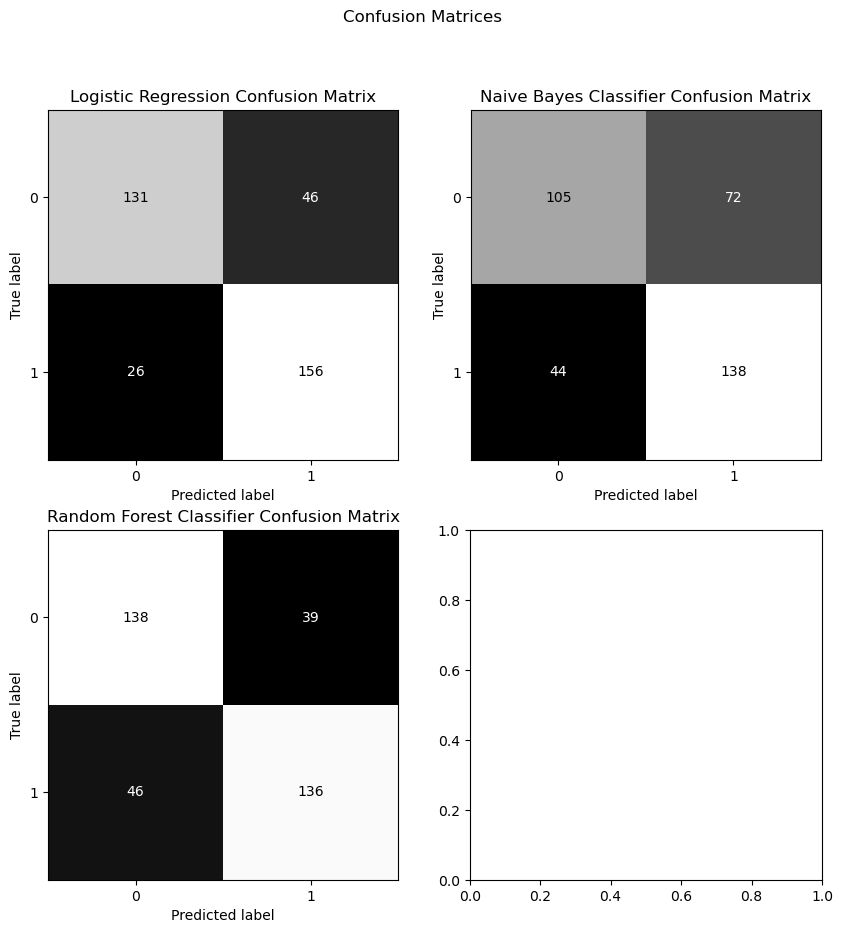

In [50]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

for model, prediction, ax in zip(models, predictions, [ax1, ax2, ax3]):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(include_values=True, cmap='gray', ax=ax, colorbar=False)
    disp.ax_.set_title(f'{model} Confusion Matrix')

plt.suptitle('Confusion Matrices')
plt.show()

# display the confusion matrix for each model

In [51]:
from sklearn.metrics import roc_curve, auc

In [54]:
y_lr_pred_prob = lr.predict_proba(X_test)
y_nbv_pred_proba = nbc.predict_proba(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

pred_probabilities = [y_lr_pred_prob, y_nbv_pred_proba, y_rfc_pred_proba]

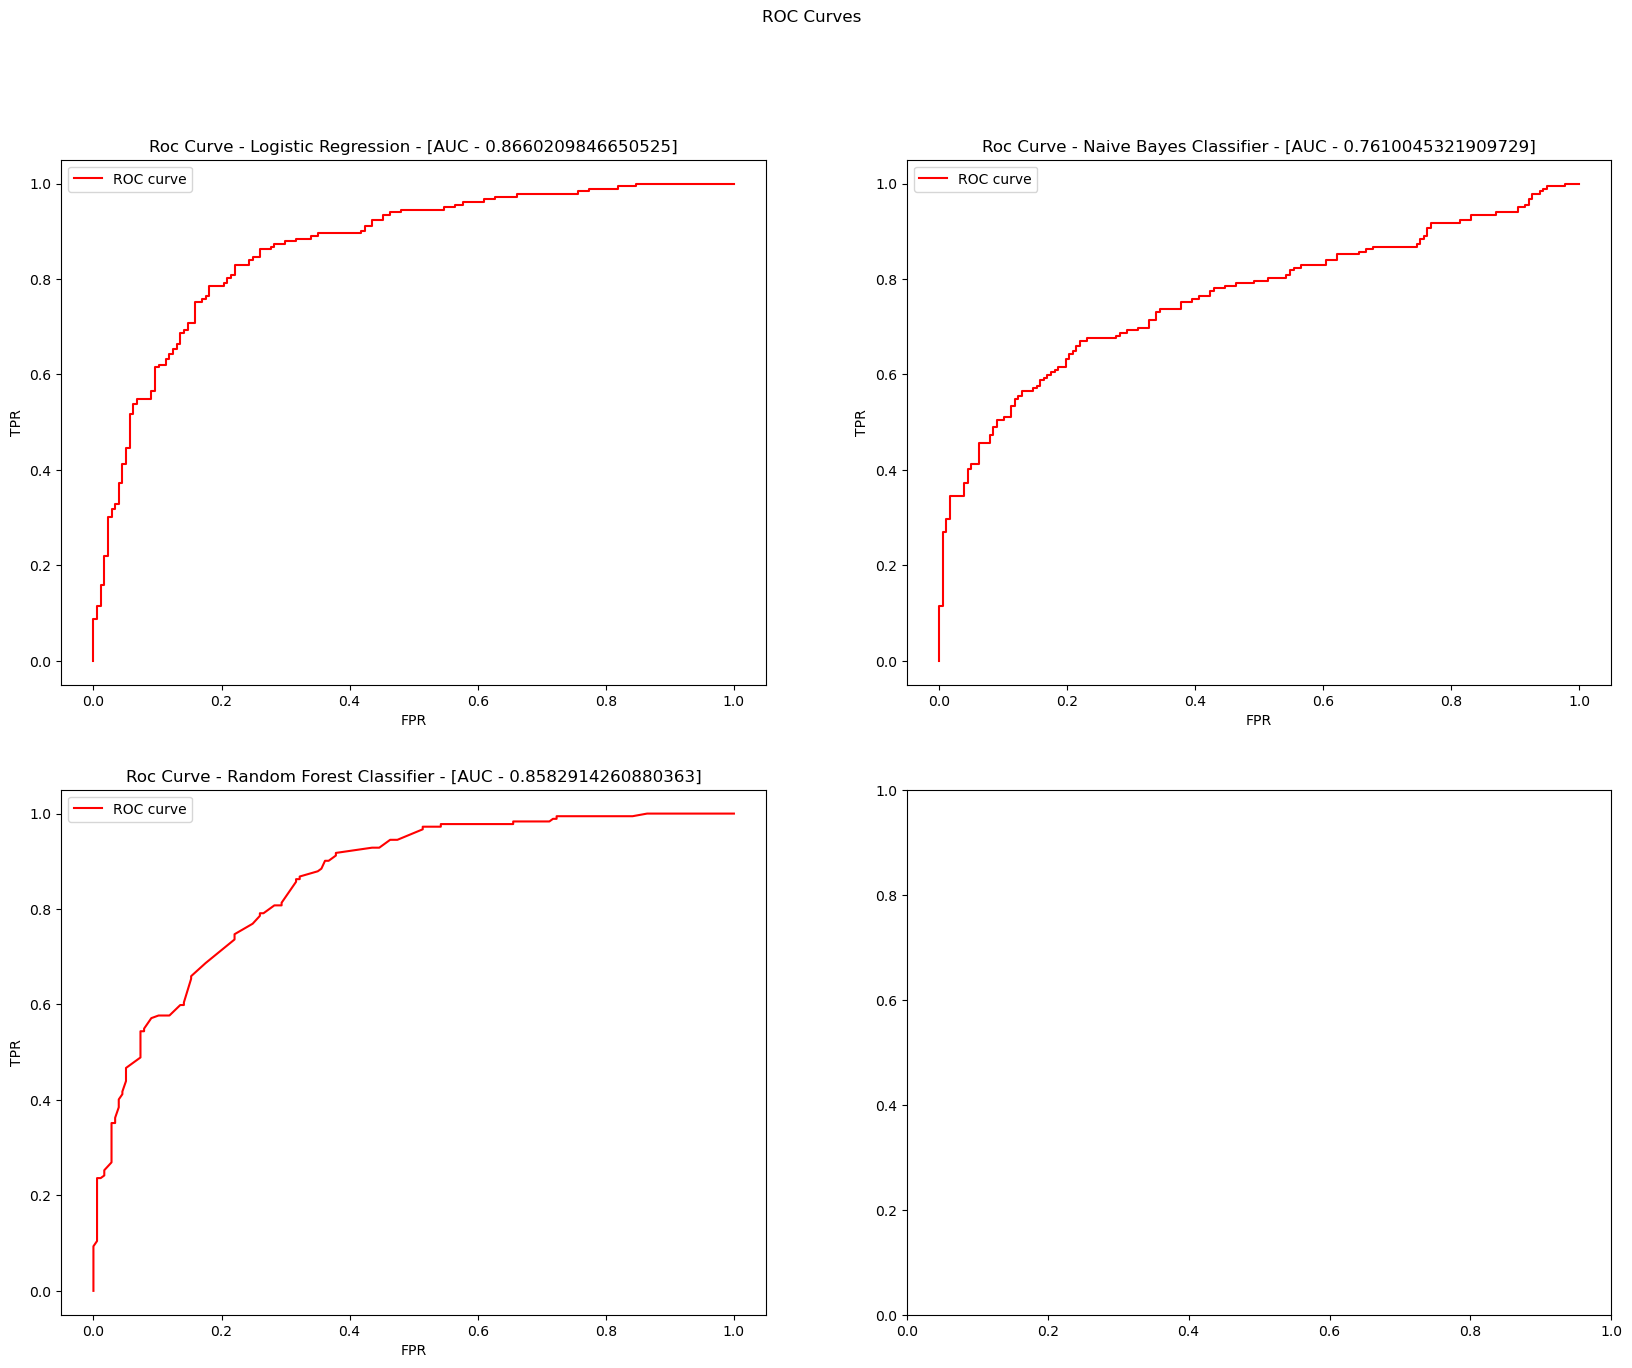

In [55]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))

for model, prediction, pred_proba, ax in zip(models, predictions, pred_probabilities, [ax1, ax2, ax3]):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    ax.plot(fpr, tpr, 'r', label='ROC curve')
    auc_score = auc(fpr, tpr)
    ax.set_title(f'Roc Curve - {model} - [AUC - {auc_score}]')
    ax.set_xlabel('FPR')
    ax.set_ylabel('TPR')
    ax.legend()
    
plt.suptitle('ROC Curves')
plt.show()
